In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

In [3]:
data_path = "C:\\Users\\medep\\Downloads\\archive (23)\\Vaccine_dataset_AstraZeneca.csv"
df = pd.read_csv(data_path)

In [4]:
df.head()

,id,Tweet,Subjectivity,Polarity,Target
0,0,"Respiratory syncytial virus, or RSV, is a comm...",0.5,-0.300000,Negative
1,1,"As pioneers in asthma, we continue to push the...",0.0,0.000000,Neutral
2,2,It takes innovation to transform healthcare ex...,0.0,0.000000,Neutral
3,3,Every day billions of people are trying to bal...,0.0,0.000000,Neutral
4,4,An estimated 37 million people live with chron...,0.5,0.136364,Positive


In [5]:
df.isnull().sum()

id              0
Tweet           0
Subjectivity    1
Polarity        1
Target          1
dtype: int64

In [8]:
text_column = 'Tweet'
label_column = 'Target'

In [9]:
df['text_length'] = df[text_column].apply(lambda x: len(x.split()))
print("\nText Length Stats:")
print(df['text_length'].describe())


Text Length Stats:
count    1553.000000
mean       17.765615
std         2.499573
min         1.000000
25%        16.000000
50%        18.000000
75%        19.000000
max        27.000000
Name: text_length, dtype: float64


In [10]:
df[label_column].value_counts()

Target
Positive    739
Neutral     677
Negative    136
Name: count, dtype: int64

C:\Users\medep\Downloads\Navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


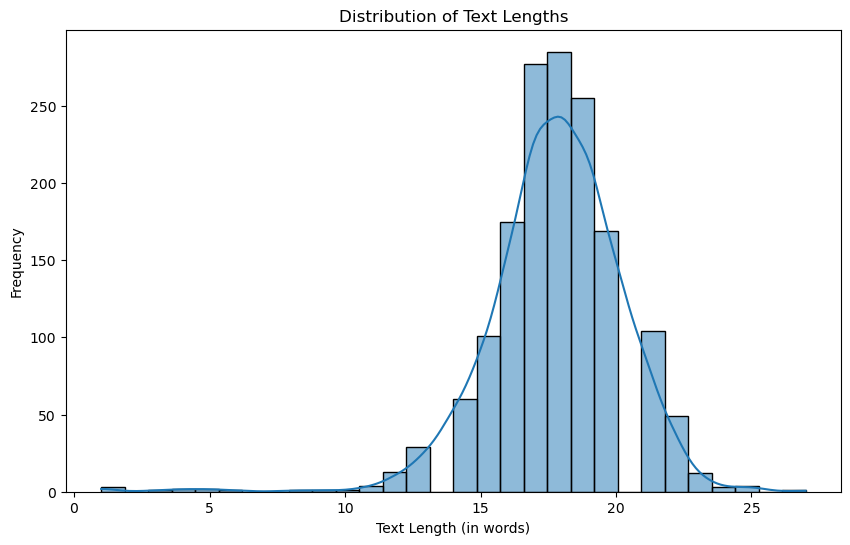

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (in words)')
plt.ylabel('Frequency')
plt.show()

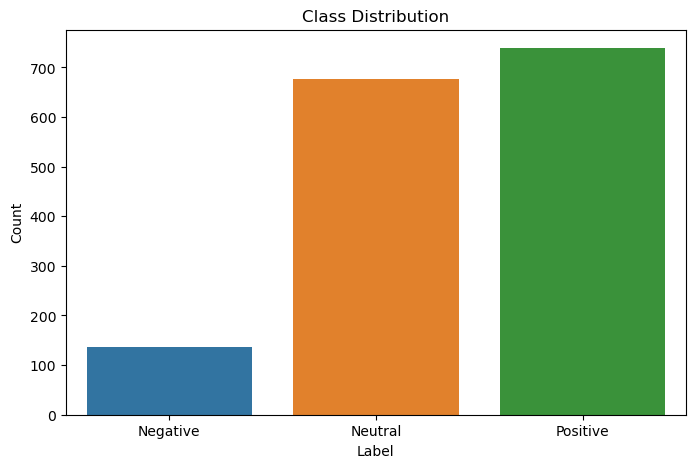

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df[label_column])
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [13]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Basic preprocessing: remove non-alphabetical characters, convert to lowercase
    text = re.sub(r'\W+', ' ', text)
    text = text.lower()
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\medep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df['processed_text'] = df[text_column].apply(preprocess_text)
all_words = ' '.join(df['processed_text'])
filtered_words = [word for word in all_words.split() if word not in stop_words]

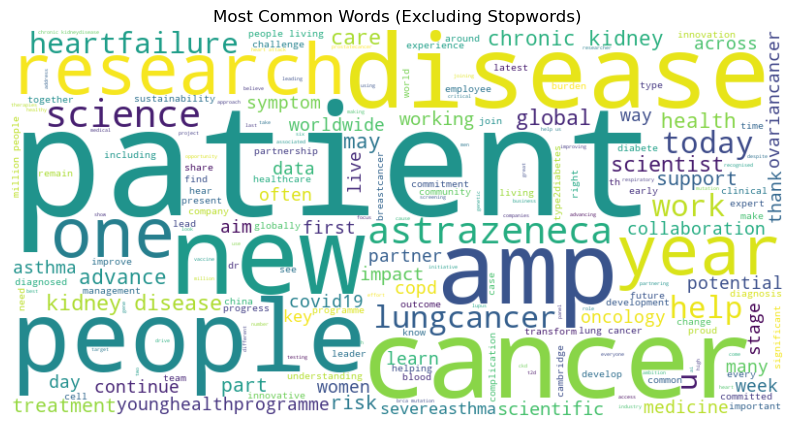

In [15]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words (Excluding Stopwords)')
plt.show()


In [16]:
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)
print("\nTop 20 Most Common Words (Excluding Stopwords):")
for word, freq in common_words:
    print(f"{word}: {freq}")


Top 20 Most Common Words (Excluding Stopwords):
patients: 188
cancer: 156
people: 139
disease: 138
new: 113
science: 102
chronic: 96
amp: 83
research: 80
help: 79
one: 75
risk: 75
us: 68
year: 67
today: 66
kidney: 64
astrazeneca: 60
patient: 58
lungcancer: 57
living: 55


C:\Users\medep\Downloads\Navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


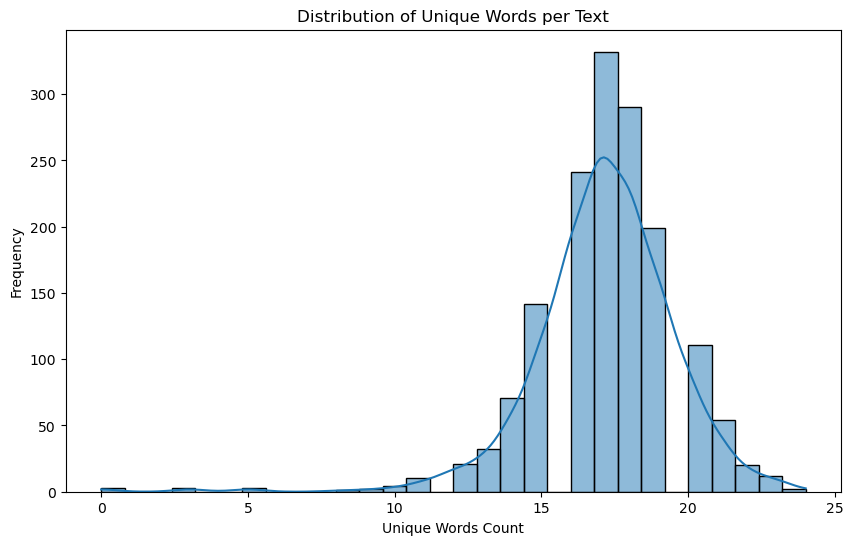

In [17]:
df['unique_words'] = df['processed_text'].apply(lambda x: len(set(x.split())))
plt.figure(figsize=(10, 6))
sns.histplot(df['unique_words'], bins=30, kde=True)
plt.title('Distribution of Unique Words per Text')
plt.xlabel('Unique Words Count')
plt.ylabel('Frequency')
plt.show()